# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here.
import pandas as pd
import numpy as np
import pylab as plt

student_data = pd.DataFrame({'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

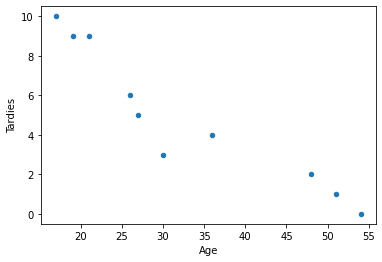

In [5]:
# Your code here.
student_data.plot.scatter(x='Age', y='Tardies');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
#Aparentemente se ve una relación lineal en inversamente proporcional, es decir, cuanto mayor es el alumno, menos veces llega tarde.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
# Your response here.
#covarianza
student_data.cov()

,StudentID,Age,Tardies
StudentID,9.166667,7.722222,-3.722222
Age,7.722222,187.655556,-45.566667
Tardies,-3.722222,-45.566667,12.544444


In [7]:
#correlación
student_data.corr()

,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


In [ ]:
# la correlación me está confirmando lo que se veía en el diagrama de dispersión, existe una alta correlación inversa entre la edad y el número de veces que llegan tarde, aunque ello no implica causalidad.
# La covarianza es el grado de variación conjunta de dos variables respecto a sus media. Parece que existe una dependencia entre ambas variables.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [9]:
# Your response here.
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [10]:
x=sm.add_constant(student_data.Age)

y=student_data.Tardies

modelo=sm.OLS(y, x).fit()

In [11]:
pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           5.57e-05
Time:                        13:07:58   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# La variable objetivo es Tardies (nº de veces que llega tarde un alumno) y el tipo de regresión que he utilizado es OLS

Plot your regression model on your scatter plot.

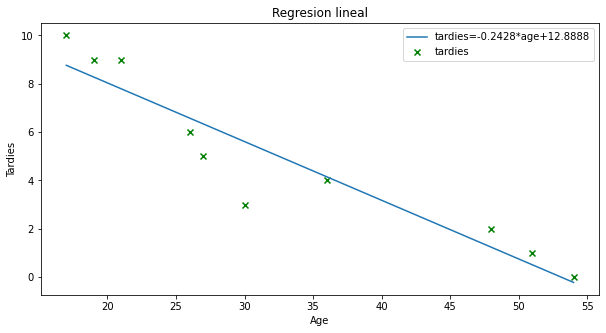

In [15]:
# plot

x=np.linspace(student_data.Age.min(), student_data.Age.max(), 50)
y=-0.2428*x + 12.8888

plt.figure(figsize=(10, 5))

# la recta de ajuste
plt.plot(x, y, label='tardies={}*age+{}'.format(-0.2428, 12.8888))

# datos
plt.scatter(student_data.Age, student_data.Tardies, marker='x', c='g', label='tardies')

plt.title('Regresion lineal')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
# R2 tiene un valor suficientemente alto y pvalue es 0, por lo que parece que se puede confiar en la predicción de la tardanza de los alumnos.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [16]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('../data/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [19]:
vehicles = vehicles.drop(['Model', 'Engine Displacement', 'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type', 'City MPG', 'Highway MPG'], axis = 1)

In [20]:
# Your response here.
vehicles.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


In [ ]:
# Parece que Fuel Barrels/Year y Fuel Cost/Year tienen alta correlación positiva, mientras que Combined MPG tiene alta correlación negativa. Cylinders tiene correlación alta pero no llega a ser tan determinante.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [43]:
# Your response here. 
# varias variables

x=sm.add_constant(vehicles[[
    
    'Year',
    'Cylinders',
    'Fuel Barrels/Year',
    'Combined MPG',
    'Fuel Cost/Year'
    
]]

)

y=vehicles['CO2 Emission Grams/Mile']


modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                             15:27:16   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# Las variables más importantes son Fuel Barrels/Year, Fuel Cost/Year y Combined MPG. Son los que más afectan a R2.
#Parece que usar el OLS es buena idea porque R2 es muy alto.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [44]:
# Your code here. 
df=pd.read_clipboard()
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

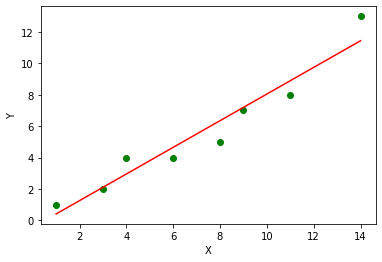

In [48]:
# Your code here.
x = df.X
y = df.Y
df.plot.scatter(x='X', y='Y');
#use green as color for individual points
plt.plot(x, y, 'o', color='green')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#use red as color for regression line
plt.plot(x, m*x+b, color='red')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 
# Se aprecia una relación lineal entre ambas variables.

In [50]:
x=sm.add_constant(df.X)

y=df.Y

modelo=sm.OLS(y, x).fit()

x=sm.add_constant(df.X)
y=df.Y

modelo=sm.OLS(y, x).fit()
pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           0.000102
Time:                        16:16:48   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 
# No hay outliers.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 